In [2]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 MB 12.4 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 20.1 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 19.0 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 19.6 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.0 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 21.6 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.6 MB/s eta 0:00:0031

In [6]:
import tensorflow as tf
from tensorflow import keras

# Data Preparation

In [593]:
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

import warnings
warnings.filterwarnings('ignore')

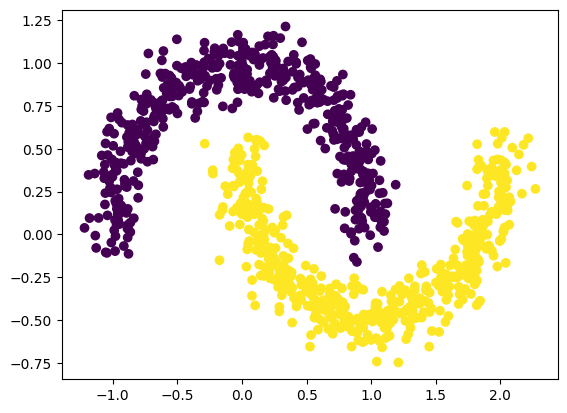

In [584]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

data, classes = make_moons(noise=0.1, random_state=42, n_samples=1000)
plt.scatter(data[:, 0], data[:, 1], c=classes)

train_X, test_X, train_y, test_y = train_test_split(data, classes, train_size=0.8, random_state=42, shuffle=True)

Our first Neural Network Binary Classifier

In [596]:
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(2,)),
    keras.layers.Dense(10, activation=keras.activations.relu),
    keras.layers.Dense(1, activation=keras.activations.sigmoid)
])

model.compile(
    optimizer=keras.optimizers.legacy.Adam(),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryCrossentropy(), keras.metrics.Precision(), keras.metrics.Recall()]
)

log_dir = "logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

callbacks = [
    keras.callbacks.TensorBoard(log_dir=log_dir)
]

model.fit(
    train_X, 
    train_y, 
    verbose=1, 
    callbacks=callbacks,
    epochs=100
)

Epoch 1/100
25/25 [==============================] - 0s 674us/step - loss: 0.7254 - binary_crossentropy: 0.7254 - precision_218: 0.5000 - recall_218: 0.0075  
Epoch 2/100
25/25 [==============================] - 0s 670us/step - loss: 0.6855 - binary_crossentropy: 0.6855 - precision_218: 1.0000 - recall_218: 0.0675  
Epoch 3/100
25/25 [==============================] - 0s 642us/step - loss: 0.6512 - binary_crossentropy: 0.6512 - precision_218: 1.0000 - recall_218: 0.2075
Epoch 4/100
25/25 [==============================] - 0s 576us/step - loss: 0.6225 - binary_crossentropy: 0.6225 - precision_218: 0.9924 - recall_218: 0.3275
Epoch 5/100
25/25 [==============================] - 0s 558us/step - loss: 0.5967 - binary_crossentropy: 0.5967 - precision_218: 0.8995 - recall_218: 0.4250
Epoch 6/100
25/25 [==============================] - 0s 530us/step - loss: 0.5725 - binary_crossentropy: 0.5725 - precision_218: 0.8412 - recall_218: 0.4900
Epoch 7/100
25/25 [==============================] - 0

In [590]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [599]:
%tensorboard --logdir logs 

Reusing TensorBoard on port 6006 (pid 45806), started 0:10:36 ago. (Use '!kill 45806' to kill it.)

5000/5000 [==============================] - 1s 283us/step


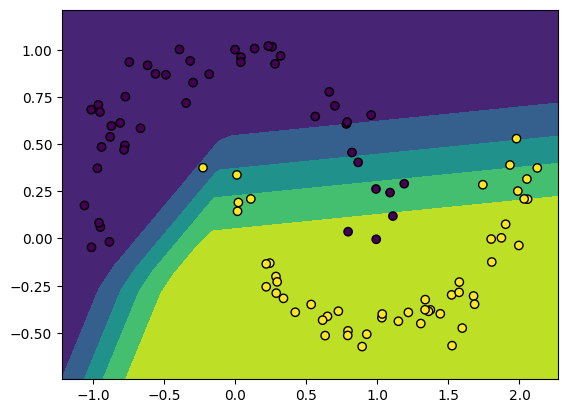

In [619]:
def plot_results(model, levels=5, show_class=False, samples=100, alpha=1):
    # we create 2d space with all pairs within data range
    feature_1, feature_2 = np.meshgrid(
        np.linspace(data[:, 0].min(), data[:, 0].max(), 400),
        np.linspace(data[:, 1].min(), data[:, 1].max(), 400)
    )
    # and turn it into a list of pairs to be able to pass this to the model
    grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T

    # after calling the model we get a list of predictions that 
    # we reshape back to 2d
    results = model.predict(grid).reshape(feature_1.shape)
    if show_class:
        results = np.round(results)
        
    # results = np.round(results)
    plt.contourf(feature_1, feature_2, results, levels=levels)
    
    # drawing all training data on top of the chart would make it unreadable
    # so we sample 
    np.random.seed(42)
    indexes = np.random.choice(len(train_X), samples, replace=False)
    sampled = train_X[indexes]
    sampled_y = train_y[indexes]

    plt.scatter(sampled[:, 0], sampled[:, 1], c=sampled_y, alpha=alpha, edgecolors='black')

plot_results(model)

Play with different settings, try changing:
- activation functions for hidden layers,
- number of neurons,
- number of hidden layers
- number of training epochs

and rerun the following code several times

25/25 [==============================] - 0s 419us/step - loss: 0.1208 - precision_237: 0.9395 - recall_237: 0.9700
Train
Precision: 0.9394673109054565
Recall: 0.9700000286102295


7/7 [==============================] - 0s 622us/step - loss: 0.1146 - precision_237: 0.9515 - recall_237: 0.9800
Test
Precision: 0.9514563083648682
Recall: 0.9800000190734863
5000/5000 [==============================] - 1s 286us/step


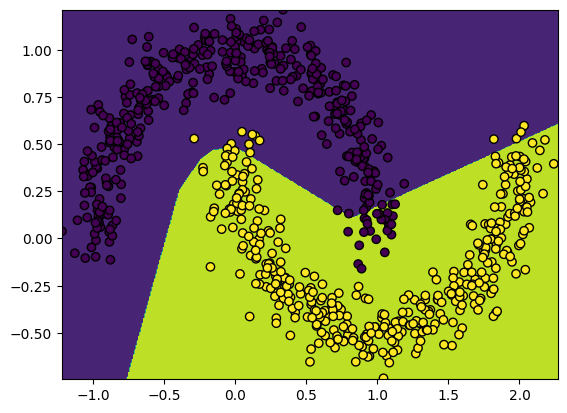

In [618]:
keras.utils.set_random_seed(42)

model2 = keras.Sequential([
    keras.layers.InputLayer(input_shape=(2,)),
    keras.layers.Dense(5, activation=keras.activations.relu),
    keras.layers.Dense(4, activation=keras.activations.relu),
    keras.layers.Dense(1, activation=keras.activations.sigmoid)
])

model2.compile(
    optimizer=keras.optimizers.legacy.Adam(),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[
        keras.metrics.Precision(), 
        keras.metrics.Recall(),
    ]
)

callbacks = [
    # uncomment to add TensorBoard logging
    keras.callbacks.TensorBoard(log_dir='./logs/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")) 
]

model2.fit(
    train_X, 
    train_y, 
    verbose=0,
    epochs=100,
    callbacks=callbacks
)

loss, precision, recall = model2.evaluate(train_X, train_y)
print(f"Train\nPrecision: {precision}\nRecall: {recall}\n\n")

loss, precision, recall = model2.evaluate(test_X, test_y)
print(f"Test\nPrecision: {precision}\nRecall: {recall}")

plot_results(model2, show_class=True, samples=len(train_X))